In [ ]:
!pip install aed-utilities

# 4 Estructuras de datos elementales

Los sistemas o métodos de organización de datos que permiten un almacenamiento eficiente de la información en la memoria del computador son conocidos como estructuras de datos. Estos métodos de organización constituyen las piezas básicas para la construcción de algoritmos complejos, y permiten implementarlos de manera eficiente.

En el presente capítulo se presentan las estructuras de datos básicas como son arreglos, listas enlazadas y árboles, con las cuales se implementarán posteriormente los _tipos de datos abstractos_.

## Arreglos

Un arreglo es una secuencia contigua en memoria, que almacena un número fijo de elementos homogéneos. En la siguiente figura se muestra un arreglo de enteros con 10 elementos:

![ejemplo-arreglo](recursos/ejemplo-arreglo.png)

Una ventaja que tienen los arreglos es que el costo de acceso a un elemento dado del arreglo es constante, es decir no hay diferencias de costo entre accesar el primer, el último o cualquier elemento del arreglo, lo cual es muy eficiente. La desventaja es que es necesario definir a priori el tamaño del arreglo, lo cual puede generar mucha pérdida de espacio en memoria si se definen arreglos muy grandes para contener conjuntos pequeños de elementos.

Esta característica de costo de acceso constante es esencial para la eficiencia de algunos algoritmos muy importantes, como por ejemplo el siguiente:

### Ejemplo: Búsqueda Binaria

Supongamos que queremos buscar un elemento $x$ en un arreglo $a$ de tamaño $n$. Si no tenemos más información sobre el orden de los elementos dentro del arreglo, lo único que podemos hacer es una *búsqueda secuencial*, la cual tiene costo $\Theta(n)$ tanto en el peor caso como en el caso promedio.

Pero si sabemos que los elementos están en orden ascendente, existe una forma mucho más eficiente, llamada *búsqueda binaria*.

La idea es comparar primero $x$ conta el elemento del centro del arreglo. Si tenemos suerte, lo encontramos ahí, pero incluso si no tenemos suerte, podemos de inmediato descartar la mitad del arreglo. En efecto, si $x$ es mayor que el elemento del centro, entonces basta seguir buscando en la segunda mitad. De la misma manera, si $x$ es menor, basta seguir buscando en la primera mitad.

In [1]:
import numpy as np
a=np.array([12,25,29,34,45,53,59,67,86,92])

In [2]:
# Búsqueda binaria, versión recursiva
# busca x en el arreglo a, retorna subíndice o -1 si no está
def bbin(x,a):
    # Definimos una función auxiliar para
    # buscar en el subarreglo a[i],...,a[j]
    def bbin_rec(x,a,i,j): 
        if i>j:
            return -1
        k=(i+j)//2
        if x==a[k]:
            return k
        if x<a[k]:
            return bbin_rec(x,a,i,k-1)
        else:
            return bbin_rec(x,a,k+1,j)

    # puntapié inicial
    n=len(a)
    return bbin_rec(x,a,0,n-1)

In [3]:
print(bbin(12,a), bbin(53,a), bbin(92,a), bbin(30,a))

0 5 9 -1


In [4]:
# Búsqueda binaria, versión iterativa
# busca x en el arreglo a, retorna subíndice o -1 si no está
def bbin(x,a):
    n=len(a)
    i=0
    j=n-1
    while i<=j:
        k=(i+j)//2
        if x==a[k]:
            return k
        if x<a[k]:
            j=k-1
        else:
            i=k+1
    return -1

In [5]:
print(bbin(12,a), bbin(53,a), bbin(92,a), bbin(30,a))

0 5 9 -1


Podemos estimar rápidamente la eficiencia de este algoritmo si vemos que para hacer una búsqueda en un conjunto de tamaño $n$, después de accesar el elemento del medio, en el peor caso continuamos buscando en un conjunto de tamaño aproximadamente igual a la mitad:

$$
T(n)=1+T\left(\frac{n}{2}\right)
$$

Aplicando el Teorema Maestro con $p=1$, $q=2$, $r=0$, vemos que $T(n)=\Theta(\log{n})$.
Por lo tanto, gracias a que el arreglo está ordenado, una búsqueda binaria es mucho más eficiente que una búsqueda secuencial.

La ecuación anterior nos permite obtener una estimación rápida, pero no refleja de manera totalmente exacta lo que ocurre en el algoritmo.
Si queremos modelar de manera precisa lo que ocurre en el peor caso, la ecuación correcta es

$$
\begin{align}
T(n) &= 1 + T\left(\left\lceil\frac{n-1}{2}\right\rceil\right)\\
T(1) &= 1
\end{align}
$$

donde la notación "techo" $\lceil x\rceil$ denota el menor entero mayor o igual a $x$ (y, similarmente, la notación "piso" $\lfloor x \rfloor$ denota el mayor entero menor o igual a $x$).

Si tabulamos el valor de la función $T(n)$ para los primeros valores de $n$, tenemos:

| $𝑛$  | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $T(n)$ | 1 | 2 | 2 | 3 | 3 | 3 | 3 | 4 | 4 | 4 | 4 | 4 | 4 | 4 | 4 |5 | 5 |

Observando esta tabla, no es difícil adivinar la solución:

$$
T(n) = \lceil \log_2{(n+1)} \rceil
$$

---

### Una manera más eficiente de programar la búsqueda binaria

En el análisis anterior, hemos considerado que en cada iteración, el costo de accesar el elemento $a[k]$ es igual a $1$, representando así el costo total de comparar primero con`==`y luego con `<`.
Si quisiéramos hacer una contabilidad más precisa, deberíamos decir que ese costo es en realidad de $2$ comparaciones por cada iteración.
A continuación veremos que es posible reducir eso a $1$ comparación por ciclo, si utilizamos comparaciones de tipo `<=`:

In [6]:
# Búsqueda binaria, versión iterativa y con <=
# busca x en el arreglo a, retorna subíndice o -1 si no está
def bbin(x,a):
    n=len(a)
    i=0
    j=n-1
    while i<j: # conjunto tiene al menos 2 elementos
        k=(i+j)//2
        if x<=a[k]:
            j=k    # x estaría en a[i],...,a[k]
        else:
            i=k+1  # x estaría en a[k+1],...,a[j]
    # al terminar, el conjunto factible se ha reducido a 0 o 1 elemento
    if i==j and x==a[i]:
        return i
    else:
        return -1

In [7]:
print(bbin(12,a), bbin(53,a), bbin(92,a), bbin(30,a))

0 5 9 -1


En esta versión logramos ahorrar una comparación de elementos por iteración, al precio de que toda las búsquedas ahora hacen el máximo de iteraciones, a diferencia del algoritmo original, en donde si teníamos suerte el algoritmo buscado se podría encontrar en las primeras iteraciones.

Este es un precio que vale la pena pagar, porque en el algoritmo original son muy pocos los casos en que la búsqueda termina tempranamente, y en la gran mayoría de los casos igual se hace un número de iteraciones muy cercano al máximo.

## Estructuras enlazadas

Como hemos visto, los arreglos permiten que algunos algoritmos se puedan programar de manera muy eficiente, pero las estructuras basadas en arreglos suelen ser muy rígidas.
Por ejemplo, si quisiéramos agregar un nuevo elemento al arreglo ordenado en que se hace búsqueda binaria (suponiendo que hubiera holgura suficiente), la inserción tomaría tiempo $\Theta(n)$ tanto en el peor caso como en promedio, por la necesidad de preservar el orden de los elementos.

Veremos a continuación que podemos diseñar estructuras mucho más flexibles sin hacemos uso de la capacidad de definir clases de objetos que contienen dentro de sus campos referencias (también llamadas "punteros") a otros objetos.

## Listas de enlace simple

Comenzaremos viendo la estructura más sencilla de este tipo: una secuencia de nodos, en que cada uno contiene una referencia al siguiente de la lista. Consideremos nodos compuestos de dos *campos* (o *atributos*): `info` y `sgte`. El primero almacena el elemento de la secuencia, y el segundo apunta al siguiente nodo. Por ejemplo, un nodo que almacena el valor $42$ y que apunta al siguiente nodo se puede representar gráficamente así:

![Nodo](recursos/Nodo.png)

O, más simplemente:

![Nodo-circular](recursos/Nodo-circular.png)

Para definir el formato de estos nodos utilizaremos la siguiente definición de clase, la que incluye un constructor para inicializar sus campos al crear un objeto:

In [8]:
class Nodo:
    def __init__(self, info, sgte=None):
        self.info=info
        self.sgte=sgte

In [9]:
p=Nodo(42)
print(p.info, p.sgte)

42 None


El siguiente trozo de programa muestra la construcción de una lista con 4 elementos: $42$, $65$, $13$ y $44$, y un ejemplo simple de uso:

In [10]:
primero=Nodo(42,Nodo(65,Nodo(13,Nodo(44))))
p=primero
while p is not None:
    print(p.info, end=" ")
    p=p.sgte
print()

42 65 13 44 


Algo adicional respecto de la representación gráfica. Cuando una referencia es nula (`None`), es tradicional representarla como "conectada a tierra":

![Nodo-None](recursos/Nodo-None.png)

Al usar la representación con nodos circulares, la ausencia de un nodo siguiente la podemos representar simplemente por la ausencia de la flecha saliente:

![Nodo-circular-None](recursos/Nodo-circular-None.png)

O, si queremos hacer explícita la ausencia de un nodo siguiente (o, en otras palabras, que el puntero al nodo siguiente es nulo), podemos representarlo por un nodo cuadrado, que es una convención que nos resultará muy conveniente más adelante, al ver *árboles*:

![Nodo-circular-cuadrado](recursos/Nodo-circular-cuadrado.png)

Con esta última convención, la lista que construimos en el ejemplo anterior, se visualizaría así:

![lista-ejemplo](recursos/lista-ejemplo.png)

A continuación definiremos una clase `Lista`, que contendrá el puntero al primer nodo de la lista, así como la funcionalidad que necesitamos para operar sobre la lista:

In [ ]:
import aed_utilities as aed

class Lista:
    def __init__(self):
        self.primero=None
        
    def insertar_al_inicio(self,info):
        self.primero=Nodo(info,self.primero)
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        p.sgte=Nodo(info,p.sgte)
    
    def eliminar_al_inicio(self):
        assert self.primero is not None
        self.primero=self.primero.sgte
    
    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.primero
        j=1
        while p is not None:
            if j==k:
                return p
            p=p.sgte
            j+=1
        return None
    
    def imprimir(self):
        p=self.primero
        while p is not None:
            print(p.info, end=" ")
            p=p.sgte
        print()

    #Método para dibujar una lista enlazada.
    # - Se crea una instancia de la clase LinkedListDrawer. Este objeto necesita conocer cómo se llaman los 
    #   campos de la estructura de los nodos de la lista. Para eso sirven los parámetros:
    #     - fieldHeader: nombre del campo en la lista con el primer puntero de la lista
    #     - fieldData: nombre del campo en el nodo que almacena la data
    #     - fieldLink: nombre del campo en el nodo que almacena el puntero
    #     - strHeader: cadena de texto que representa la cabecera de la lista
    # - Para dibujar se llama al método "draw_linked_list" con la lista como parámetro
    
    def dibujar(self):
      lld = aed.LinkedListDrawer(fieldHeader="primero", fieldData="info", fieldLink="sgte", strHeader="primero")
      lld.draw_linked_list(self)

In [55]:
L=Lista()
L.insertar_al_inicio(44)
L.insertar_al_inicio(13)
L.insertar_al_inicio(65)
L.insertar_al_inicio(42)
L.imprimir()

42 65 13 44 


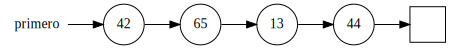

In [56]:
L.dibujar()

42 65 88 13 44 


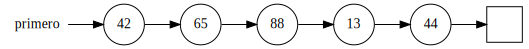

In [57]:
L.insertar_despues_de(L.k_esimo(2),88)
L.imprimir()
L.dibujar()

65 88 13 44 


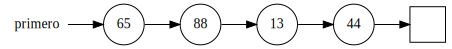

In [58]:
L.eliminar_al_inicio()
L.imprimir()
L.dibujar()

65 13 44 


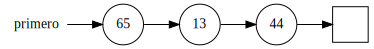

In [59]:
L.eliminar_sgte_de(L.k_esimo(1))
L.imprimir()
L.dibujar()

---

Hay algunas cosas que no resultan muy elegantes en el diseño de listas que estamos considerando hasta el momento.

Una de ellas es que para eliminar un elemento, no se pueda indicar al elemento que se desea eliminar, sino que haya que indicar al previo. Esto es inevitable, dado el caracter unidireccional de los enlaces, y más adelante, cuando veamos _listas de doble enlace_ veremos que eso puede mejorarse.

Otro punto molesto en la interfaz de uso es la necesidad de distinguir entre si se opera al comienzo de la lista, o en un punto interior. Esto es porque las operaciones afectan al elemento previo, y el primero de la lista, por definición, no tiene un elemento previo.

Esto puede subsanarse, sin embargo, introduciendo un nodo "cabecera" ("*header*") al comienzo de la lista. Este nodo no contiene información útil y para todos los efectos es como si no existiera, excepto que sirve como el previo del primer nodo real de la lista. Para poder ubicarlo, lo identificaremos con el nodo "0-ésimo" de la lista.

![lista-ejemplo-con-cabecera](recursos/lista-ejemplo-con-cabecera.png)

A continuación reescribimos nuestra definición de la clase `Lista` y sus ejemplos de uso, bajo el supuesto de que existe un nodo cabecera.

In [ ]:
class Lista_con_cabecera:
    def __init__(self):
        self.cabecera=Nodo(0,None)
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        p.sgte=Nodo(info,p.sgte)
    
    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while True:
            if j==k:
                return p
            p=p.sgte
            if p is None:
                return None
            j+=1
    
    def imprimir(self):
        p=self.cabecera.sgte
        while p is not None:
            print(p.info,end=" ")
            p=p.sgte
        print()

In [ ]:
L=Lista_con_cabecera()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)
L.imprimir()

42 65 13 44 


In [ ]:
L.eliminar_sgte_de(L.k_esimo(0)) # eliminar el primero
L.imprimir()

65 13 44 


In [ ]:
print(L.k_esimo(7))

None


In [ ]:
L.eliminar_sgte_de(L.k_esimo(1)) # eliminar un elemento en el medio
L.imprimir()

65 44 


### Recorriendo la lista con un iterador

A continuación veremos cómo, en lugar de imprimir la lista, podemos implementar un iterador que vaya entregando los elementos de la lista cada vez que es llamado:

In [ ]:
class Lista_con_cabecera:
    def __init__(self):
        self.cabecera=Nodo(0,None)
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        p.sgte=Nodo(info,p.sgte)
    
    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while p is not None:
            if j==k:
                return p
            p=p.sgte
            j+=1
        return None
    
    def valores(self):
        p=self.cabecera.sgte
        while p is not None:
            yield p.info
            p=p.sgte

In [ ]:
L=Lista_con_cabecera()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)

In [ ]:
for x in L.valores():
    print(x, end=" ")
print()

42 65 13 44 


In [ ]:
print([x for x in L.valores()])

[42, 65, 13, 44]


## Listas de doble enlace

Las listas de enlace simple permiten solo procesos unidireccionales, por lo que no son muy apropiadas cuando los procesos necesitan poder recorrerlas en ambas dicecciones.

Podemos mejorar esto si agregamos a los nodos una referencia al nodo *previo*, además del nodo siguiente:

![Nodo-doble](recursos/Nodo-doble.png)

 

In [60]:
class Nodo:
    def __init__(self, prev, info, sgte):
        self.prev=prev
        self.info=info
        self.sgte=sgte

Con este tipo de nodos podemos formar una lista que puede ser recorrida en ambas direcciones.
Por consideraciones similares a las anteriores, resulta conveniente agregar un nodo cabecera en cada extremo, pero en realidad un mismo nodo puede jugar ambos roles, con lo cual la lista adopta un aspecto físicamente circular, aunque desde un punto de vista conceptual no lo sea:

![lista-ejemplo-doble-enlace](recursos/lista-ejemplo-doble-enlace.png)

La siguiente es una definición de lista de doble enlace, con alguna de la funcionalidad que ella permite:

In [61]:
import aed_utilities as aed

class Lista_doble_enlace:
    def __init__(self):
        self.cabecera=Nodo(None,0,None)
        self.cabecera.prev=self.cabecera
        self.cabecera.sgte=self.cabecera
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        r=p.sgte
        p.sgte=r.prev=Nodo(p,info,r)
 
    def eliminar(self,p): # elimina el nodo p
        assert p is not self.cabecera
        (p.prev.sgte,p.sgte.prev)=(p.sgte,p.prev)
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while True:
            if j==k:
                return p
            p=p.sgte
            if p is self.cabecera:
                return None
            j+=1
    
    def ascendente(self):
        p=self.cabecera.sgte
        while p is not self.cabecera:
            yield p.info
            p=p.sgte

    def descendente(self):
        p=self.cabecera.prev
        while p is not self.cabecera:
            yield p.info
            p=p.prev

    #Para dibujar una lista doblemente enlazada, es necesario además definir el nombre del campo del puntero hacia atrás.
    # El parámetro para definir ese campo es "fieldReverseLink". Por default, este campo es None.
    def dibujar(self):
      lld=aed.LinkedListDrawer(fieldHeader="cabecera", fieldData="info", fieldLink="sgte", fieldReverseLink="prev")
      lld.draw_double_linked_list(self)

[42, 65, 13, 44]
[44, 13, 65, 42]


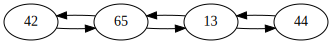

In [62]:
L=Lista_doble_enlace()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)
print([x for x in L.ascendente()])
print([x for x in L.descendente()])

L.dibujar()

[42, 65, 44]


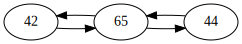

In [63]:
L.eliminar(L.k_esimo(3))
print([x for x in L.ascendente()])

L.dibujar()

---

## Árboles Binarios

Al usar nodos que hacen referencia a otros nodos, no es de ninguna manera obligatorio limitarse a estructuras lineales como las que hemos visto en las secciones anteriores: podemos construir estructuras enlazadas tan complejas como queramos.

Un tipo de estructura muy utilizada son los *árboles binarios*, en que cada nodo puede tener "hijos" tanto a su izquierda como a si derecha, y eso mismo se reproduce para los hijos, recursivamente.

Los nodos tienen un formato similar al de los nodos de doble enlace, pero las referencias se llaman `izq` (izquierda) y `der` (derecha).

![Nodo-arbol-binario](recursos/Nodo-arbol-binario.png)

Al dibujarlo con nodos circulares, normalmente las líneas no llevan flecha, porque se entiende que apuntan hacia abajo:

![Nodo-arbol-binario-circular](recursos/Nodo-arbol-binario-circular.png)

In [64]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

La siguiente figura muestra un ejemplo de un árbol binario:

![ejemplo-ABB](recursos/ejemplo-ABB.png)

Este es un tipo especial de árbol binario, llamado *árbol de búsqueda binaria* (*ABB*), que se caracteriza porque para cada nodo, sus hijos descendientes hacia la izquierda son menores que él, y los de la derecha son mayores. Más adelante estudiaremos en profundidad los ABB.

La terminología asociada a los árboles combina lo forestal con lo genealógico. El nodo de nivel superior se llama la *raíz* y los nodos que están en los niveles inferiores (los nodos cuadrados en la figura) se llaman *hojas*. Como vemos, al revés que en la naturaleza, estos árboles crecen hacia abajo.

Un nodo apunta hacia abajo a sus hijos (izquierdo y derecho), y se dice que es el *padre* de ellos. Yendo desde un nodo hacia abajo se encuentran sus *descendientes*, y hacia arriba se encuentran sus *ancestros*.

Si el nodo $b$ es descendiente del nodo $a$, se dice que la distancia entre $a$ y $b$ es el número de pasos que hay que dar para ir de $a$ a $b$. La máxima distancia entre la raíz y una hoja se llama la *altura* del árbol. En el ejemplo, la altura es $5$, que se alcanza yendo desde la raíz hasta cualquiera de las hojas hijas de $65$ o de $81$.

Al dibujar un árbol con nodos circulares y nodos cuadrados, los circulares se llaman *nodos internos* y los cuadrados, *nodos externos*. Los nodos internos siempre tienen dos hijos (internos y/o externos) y los nodos externos no tienen hijos.

La altura máxima de un árbol binario con $n$ nodos internos es $n$, y la altura mínima es $\lceil \log_2{(n+1)} \rceil$. Esto último es una consecuencia de que un árbol binario de altura $h$ puede tener a lo más $2^h$ nodos externos.

A continuación definiremos una clase árbol, con un constructor que define un puntero al nodo raíz. Para poder hacer ejemplos de uso, admitiremos que el constructor reciba un puntero a la raíz de un árbol ya construido. 

In [65]:
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz

### Recorridos de Árboles Binarios

Un árbol binario es una estructura esencialmente recursiva, y las principales formas de recorrer un árbol se definen también recursivamente.
Los tres tipos de recorridos más conocidos son:

* Preorden: Visitar la raíz, recorrer el subárbol izquierdo y recorrer el subárbol derecho

* Indorden: Recorrer el subárbol izquierdo, visitar la raíz y recorrer el subárbol derecho

* Postorden: Recorrer el subárbol izquierdo, recorrer el subárbol derecho y visitar la raíz

A continuación agregamos a la definición de la clase tres métodos que imprimen en contenido del árbol en estos recorridos:

In [81]:
import aed_utilities as aed

def pre(p):
    if p is not None:
        print(p.info,end=" ")
        pre(p.izq)
        pre(p.der)

def ino(p):
    if p is not None:
        ino(p.izq)
        print(p.info,end=" ")
        ino(p.der)

def post(p):
    if p is not None:
        post(p.izq)
        post(p.der)
        print(p.info,end=" ")
        
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz
        
    def preorden(self):
        print("Preorden:", end=" ")
        pre(self.raiz)
        print()
        
    def inorden(self):
        print("Inorden:", end=" ")
        ino(self.raiz)
        print()
        
    def postorden(self):
        print("Postorden:", end=" ")
        post(self.raiz)
        print()
    
    # Para dibujar un árbol binario, necesitamos crear una instancia de la clase BinaryTreeDrawer
    # Aquí también necesitamos conocer la estructura de los nodos. Esta información se envía como parámetro 
    # al constructor de la clase:
    #    - fieldData: nombre del campo del nodo que mantiene la data
    #    - fieldLeft: nombre del campo del nodo con el puntero izquierdo
    #    - fieldRight: nombre del campo del noso con le puntero derecho
    # Para dibujar se llama al método "draw_tree", enviando como parámetro el árbol binario y el nombre del campo que identifica al nodo raiz.
    
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der")
      btd.draw_tree(self, "raiz")


In [82]:
AX=Arbol(
    Nodo(
        Nodo(
            Nodo(None,15,None),
            20,
            Nodo(
                Nodo(None,30,None),
                35,
                None
            )
        ),
        42,
        Nodo(
            Nodo(
                Nodo(
                    Nodo(Nodo(None,62, None),65,None),
                    72,
                    Nodo(None,81,None)
                ),
                90,
                None
            ),
            95,
            None
        )
       )
)

AX1 = Arbol(Nodo(Nodo(Nodo(None,7,None),10,Nodo(None, 12, None)),18, Nodo(Nodo(None, 20,None),24,Nodo(None, 30, None))))
AX2 = Arbol(Nodo(None, 10, Nodo(None, 12, Nodo(None, 14, Nodo(None, 20, None)))))
AX3 = Arbol(Nodo(Nodo(Nodo(None,5,None),7,Nodo(None, 9, None)),10,None))

In [83]:
AX.preorden()
AX.inorden()
AX.postorden()

Preorden: 42 20 15 35 30 95 90 72 65 62 81 
Inorden: 15 20 30 35 42 62 65 72 81 90 95 
Postorden: 15 30 35 20 62 65 81 72 90 95 42 


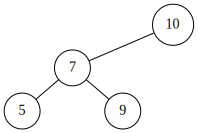

In [87]:
AX3.dibujar()

### Recorridos usando iteradores

Utilizando la instrucción ``yield`` podemos convertir estos métodos en iteradores, los cuales pueden ser utilizados desde una instrucción ``for``:

In [ ]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

In [ ]:
def pre(p):
    if p is not None:
        yield p
        yield from pre(p.izq)
        yield from pre(p.der)

def ino(p):
    if p is not None:
        yield from ino(p.izq)
        yield p
        yield from ino(p.der)
        
def post(p):
    if p is not None:
        yield from post(p.izq)
        yield from post(p.der)
        yield p
        
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz
        
    def preorden(self):
        yield from pre(self.raiz)
        
    def inorden(self):
        yield from ino(self.raiz)
        
    def postorden(self):
        yield from post(self.raiz)

In [ ]:
a=Arbol(
    Nodo(
        Nodo(
            Nodo(None,15,None),
            20,
            Nodo(
                Nodo(None,30,None),
                35,
                None
            )
        ),
        42,
        Nodo(
            Nodo(
                Nodo(
                    Nodo(None,65,None),
                    72,
                    Nodo(None,81,None)
                ),
                90,
                None
            ),
            95,
            None
        )
       )
)

In [ ]:
print ("Preorden:", [p.info for p in a.preorden()])
print ("Inorden:", [p.info for p in a.inorden()])
print ("Postorden:", [p.info for p in a.postorden()])

Preorden: [42, 20, 15, 35, 30, 95, 90, 72, 65, 81]
Inorden: [15, 20, 30, 35, 42, 65, 72, 81, 90, 95]
Postorden: [15, 30, 35, 20, 65, 81, 72, 90, 95, 42]


### Una representación alternativa para árboles binarios

Un diseño alternativo para esta estructura se basa en darle una existencia real a los nodos externos, en lugar de que sean punteros `None`. Esto nos permite asociar funcionalidad a los nodos, lo cual ejemplificamos con el recorrido en inorden:

In [73]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def inorden(self):
        self.izq.inorden()
        print(self.info, end=" ")
        self.der.inorden()

class Nodoe:
    def __init__(self):
        pass
    def inorden(self):
        pass  

In [77]:
import aed_utilities as aed

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz
        
    def inorden(self):
        print("Inorden:", end=" ")
        self.raiz.inorden()
        print()

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")

In [78]:
a=Arbol(
    Nodoi(
        Nodoi(
            Nodoi(Nodoe(),15,Nodoe()),
            20,
            Nodoi(
                Nodoi(Nodoe(),30,Nodoe()),
                35,
                Nodoe()
            )
        ),
        42,
        Nodoi(
            Nodoi(
                Nodoi(
                    Nodoi(Nodoe(),65,Nodoe()),
                    72,
                    Nodoi(Nodoe(),81,Nodoe())
                ),
                90,
                Nodoe()
            ),
            95,
            Nodoe()
        )
       )
)

In [79]:
a.inorden()

Inorden: 15 20 30 35 42 65 72 81 90 95 


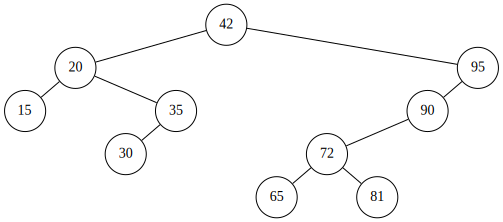

In [80]:
a.dibujar()

### Recorrido usando iteradores

De la misma manera como lo hicimos antes, podemos usar la instrucción ``yield`` para entregar uno a uno los nodos que se van visitando. Ejemplificamos esto con el recorrido en inorden:

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
        
    def inorden(self):       
        yield from self.izq.inorden()
        yield self
        yield from self.der.inorden()

class Nodoe:
    def __init__(self):
        pass
        
    def inorden(self):
        return
        yield None # no se ejecuta, permite que la función sea un generator

In [ ]:
class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz
        
    def inorden(self):
        yield from self.raiz.inorden()

In [ ]:
a=Arbol(
    Nodoi(
        Nodoi(
            Nodoi(Nodoe(),15,Nodoe()),
            20,
            Nodoi(
                Nodoi(Nodoe(),30,Nodoe()),
                35,
                Nodoe()
            )
        ),
        42,
        Nodoi(
            Nodoi(
                Nodoi(
                    Nodoi(Nodoe(),65,Nodoe()),
                    72,
                    Nodoi(Nodoe(),81,Nodoe())
                ),
                90,
                Nodoe()
            ),
            95,
            Nodoe()
        )
       )
)

In [ ]:
print ("Inorden:", [p.info for p in a.inorden()])

Inorden: [15, 20, 30, 35, 42, 65, 72, 81, 90, 95]


## Árboles para representar fórmulas

La estructura de una fórmula matemática, por ejemplo la fórmula

$$
(a+1)*\left(2-\frac{1}{b}\right)
$$

se puede representar mediante el árbol:

![arbol-formula](recursos/arbol-formula.png)

Modifiquemos la definición de nodos externos para que puedan almacenar información en su interior y veamos el efecto de hacer un recorrido en postorden de un árbol de este tipo:

In [42]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def postorden(self):
        self.izq.postorden()   
        self.der.postorden()
        print(self.info, end=" ")

class Nodoe:
    def __init__(self, info=""):
        self.info=info
    def postorden(self):
        print(self.info, end=" ")

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz        
    
    def postorden(self):
        print("Postorden:", end=" ")
        self.raiz.postorden()
        print()
    
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")

In [51]:
formula= Arbol(
            Nodoi(
                Nodoi(Nodoe("a"),"+",Nodoe("1")),
                "*",
                Nodoi(
                    Nodoe("2"),
                    "-",
                    Nodoi(Nodoe("1"),"/",Nodoe("b"))
                )
            )
        )

formula2= Arbol(
            Nodoi(
                Nodoi(Nodoe("a"),"ss",Nodoe("1")),
                "ff",
                Nodoi(
                    Nodoe("2"),
                    "uu",
                    Nodoi(Nodoe("1"),"ii",Nodoe("b"))
                )
            )
        )

In [49]:
formula.postorden()

Postorden: a 1 + 2 1 b / - * 


In [ ]:
formula2.dibujar()

El resultado de este recorrido en postorden es la misma fórmula escrita en *notación polaca de postfijo* (también llamada *notación polaca reversa* o, más simplemente, *notación polaca*).
Esta notación, inventada en 1924 por el lógico polaco Jan Łukasiewicz, se caracteriza porque el operador va a continuación de los operandos, mientras que en la notación usual (llamada de *infijo*) el operador va entre los operandos. Por ejemplo, la fórmula "$a+b$" se escribe en notación polaca como "$a b +$".

La notación polaca tiene varias ventajas.
Una de ellas es que no necesita paréntesis. Por ejemplo, si no consideramos prioridad de operadores (que es una forma implícita de parentizar), la fórmula "$a+b*c$" sería ambigua, porque podría significar "$(a+b)*c$" o "$a+(b*c)$". En notación polaca no habría ambigüedad, porque la primera se escribiría"$ab+c*$", y la segunda sería "$abc*+$".

Otra ventaja es que, como veremos más adelante, una fórmula en notación polaca se puede evaluar en una sola pasada de izquierda a derecha haciendo uso de una estructura llamada *pila* o *stack*.

---

## Propiedades matemáticas de los árboles binarios


Los árboles binarios tienen muchas propiedades interesantes:

### Relación entre nodos internos y externos

Sea $e_n$ el número de nodos externos de un árbol binario con $n$ nodos internos. Entonces $e_n=n+1$

Esta propiedad se puede demostrar de varias maneras:

Demostración 1:

Por inducción sobre el número de nodos internos. La base es un árbol vacío (`raiz==None`), para la cual $e_0=1$. Para el paso inductivo, consideremos un árbol con $n+1$ nodos internos. Ese árbol debe tener al menos un nodo interno cuyos dos hijos son nodos externos (o el árbol sería infinito). Tomemos el subárbol constituído por ese nodo y sus dos hijos y reemplacémoslo por un nodo externo. El árbol resultante tiene $n$ nodos y por lo tanto su número de nodos externos es $n+1$, por hipótesis de inducción. Deshagamos ahora el cambio efectuado: esto agrega 1 interno, y elimina 1 nodo externo pero agrega 2, de modo que el incremento neto en el número de nodos externos es 1. Por lo tanto el número de nodos externos del árbol resultante es $e_{n+1}=n+2$. QED

Demostración 2:

Por inducción sobre la estructura del árbol. Si el árbol es vacío, trivialmente se cumple $e_0=1$. Si el árbol es no vacío, digamos tiene $n+1$ nodos, entonces consiste de una raíz, más un subárbol izquierdo y un subárbol derecho. Si el subárbol izquierdo tiene $k$ nodos internos, entonces el derecho tiene $n-k$ nodos internos. El número total de nodos externos es $e_{n+1}=e_k+e_{n-k}$. Usando la hipótesis de inducción, $e_{n+1}=(k+1)+(n-k+1)=n+2$. QED

Demostración 3:

Por recorrido en inorden. Supongamos que hacemos un recorrido en inorden, escribiendo un "○" cada vez que visitamos un nodo interno, y un "☐" cada vez que visitamos un nodo externo.


In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def inorden(self):
        self.izq.inorden()
        print("○", end=" ")
        self.der.inorden()

class Nodoe:
    def __init__(self, info=""):
        self.info=info
    def inorden(self):
        print("☐", end=" ")

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz        
    def inorden(self):
        print("Inorden:", end=" ")
        self.raiz.inorden()
        print()

In [ ]:
a=Arbol(
    Nodoi(
        Nodoi(
            Nodoi(Nodoe(),15,Nodoe()),
            20,
            Nodoi(
                Nodoi(Nodoe(),30,Nodoe()),
                35,
                Nodoe()
            )
        ),
        42,
        Nodoi(
            Nodoi(
                Nodoi(
                    Nodoi(Nodoe(),65,Nodoe()),
                    72,
                    Nodoi(Nodoe(),81,Nodoe())
                ),
                90,
                Nodoe()
            ),
            95,
            Nodoe()
        )
       )
)

In [ ]:
a.inorden()

Inorden: ☐ ○ ☐ ○ ☐ ○ ☐ ○ ☐ ○ ☐ ○ ☐ ○ ☐ ○ ☐ ○ ☐ ○ ☐ 


Dado que los nodos se visitan intercalando nodos externos e internos, y en ambos extremos hay nodos externos, claramente $e_n=n+1$. QED

La última no es una demostración rigurosa (aunque se puede formalizar), pero sin duda es la que hace que la propiedad sea vea más obvia.

### Relación entre largo de caminos internos y externos

Definamos el _largo de caminos internos_ (*LCI*), denotado $I_n$, como

$$
I_n=\sum_{x\in \text{Nodos internos}}\text{distancia}(\text{raiz},x)
$$

De manera análoga, _largo de caminos externos_ (*LCE*), denotado $E_n$, como

$$
E_n=\sum_{y\in \text{Nodos externos}}\text{distancia}(\text{raiz},y)
$$

En el árbol que hemos usado de ejemplo, tenemos $n=10$, $I_n=22$, $E_n=42$.

En general, se cumple que

$$
E_n=I_n+2n
$$

Demostración: Queda como ejercicio. Sugerencia: aplicar inducción sobre la estructura del árbol.

### Enumeración de árboles binarios con $n$ nodos

Si tenemos $n$ nodos indistinguibles (no rotulados), llamemos $a_n$ al número de árboles binarios distintos que podemos construir.

Para $n=0$, tenemos que $a_0=1$ (el árbol vacío).

Para $n=1$, tenemos $a_1=1$ (el árbol con un solo nodo). La siguiente figura muestra los árboles que se puede construir con $n=1$, $n=2$ y $n=3$ nodos (mostrando solo los nodos internos):

![Enum-arboles-binarios](recursos/Enum-arboles-binarios.png)

Por lo tanto, tenemos $a_2=2$ y $a_3=5$. Nos interesa encontrar $a_n$ en el caso general.

Consideremos un árbol con $n$ nodos. Uno de ellos será la raíz, y los $n-1$ nodos restantes se deberían distribuir a la izquierda y a la derecha. Si a la izquierda quedan $k$ nodos, ahí se puede poner cualquiera de los $a_k$ árboles posible, el que se combinan con el de la derecha, que puede ser cualquiera de los $a_{n-k-1}$ árboles posibles.
Como ambas elecciones son independientes, el número de maneras en que se puede hacer es el producto de ambos números, y finalmente hay que sumar sobre todos los posibles valores de $k$.
Esto conduce a la ecuación

$$
a_{n}=\sum_{0\le k\le n-1}a_k a_{n-k-1}
$$

con la condición inicial $a_0=1$.

Esto nos permite construir una tabla de valores:



In [ ]:
import numpy as np
def enum_arboles(nmax):
    a=np.zeros(nmax,dtype=int)
    a[0]=1
    for n in range(1,nmax):
        for k in range(0,n):
            a[n]+=a[k]*a[n-1-k]
    return(a)

In [ ]:
print(enum_arboles(20))

[         1          1          2          5         14         42
        132        429       1430       4862      16796      58786
     208012     742900    2674440    9694845   35357670  129644790
  477638700 1767263190]


Para resolver este tipo de ecuaciones necesitamos herramientas matemática más avanzadas, llamadas *funciones generatrices*, de modo que aquí simplemente diremos que la solución es

$$
a_n = \frac{1}{n+1}\binom{2n}{n}
$$

llamados *números de Catalan*, y podemos comprobar con el siguiente programa que esa fórmula entrega los mismos valores que calculamos recién:

In [ ]:
# Calcula binomial(n,k) = n*(n-1)*...*(n-k+1)/k!
def binomial(n,k):
    numer=1
    denom=1
    for j in range(0,k):
        denom*=(j+1)
        numer*=(n-j)
    return(numer//denom)

def catalan(n):
    return binomial(2*n,n)//(n+1)

In [ ]:
for n in range(0,12):
    print(catalan(n), end=" ")
print()

1 1 2 5 14 42 132 429 1430 4862 16796 58786 


Los números de Catalan crecen muy rápido, y se puede demostrar que

$$
a_n \sim \frac{4^n}{n^{3/2}\sqrt{\pi}}
$$

Esto hace que, en particular, cualquier algoritmo de fuerza bruta que necesite recorrer todos los árboles binarios posibles no será práctico para valores grandes de $n$.

## Árboles cardinales (o $k$-arios)

Los árboles binarios se pueden generalizar a **árboles $k$-arios**, también llamados **árboles cardinales**.
Los nodos internos de un árbol $k$-ario tienen espacio para $k$ punteros a sus hijos. Cada uno de estos punteros puede referirse a otro nodo interno, o bien ser nulo (visualizado como un nodo externo). La siguiente figura muestra la estructura de un ejemplo de árbol ternario (3-ario):

![cardinal](recursos/cardinal.png)

Con la adición de los nodos externos, se cumple que los nodos internos siempre tienen exactamente $k$ hijos (que pueden ser nodos internos y/o externos), y los nodos externos no tienen hijos. Tal como en un árbol binario se distingue entre un hijo izquierdo y un hijo derecho, en un árbol $k$-ario distinguimos entre el hijo número 1, el hijo número 2, etc.

## Árboles ordinales ("multiway trees")

A diferencia de los árboles que hemos visto hasta ahora, en un árbol ordinal cada nodo puede tener un número ilimitado de hijos. Formalmente, un árbol ordinal consiste siempre de un nodo raíz y un conjunto ordenado de cero o más árboles hijos. Por lo tanto:

* Un árbol ordinal nunca puede ser vacío, siempre tiene al menos un nodo
* No existe el concepto de un hijo "faltante", de modo que no se utilizan nodos externos

El siguiente es un ejemplo de un árbol ordinal:

![ordinal](recursos/ordinal.png)

A primera vista, parecería que los nodos de un árbol ordinal necesitarían tener espacio para una cantidad variable de punteros a sus hijos, pero existe una correspondencia con árboles binarios que permite que el árbol se pueda almacenar usando solo dos punteros en cada nodo.

La idea es la siguiente:

* Cada nodo del árbol ordinal se representa mediante un nodo interno de un árbol binario.
* El puntero izquierdo se utiliza para apuntar al **primer hijo**. Si no hay hijos, se usa un puntero nulo (nodo externo).
* El puntero derecho se utiliza para apuntar al **siguiente hermano**. Si el nodo es el último entre los hermanos, se usa un puntero nulo (nodo externo)

Usando esta técnica, el árbol del ejemplo se representaría así:

![ordinal-binario](recursos/ordinal-binario.png)

Como la raíz del árbol ordinal no tiene hermano, en la representación de árbol binario el puntero derecho de la raíz siempre es nulo. Por lo tanto, hay una biyección entre los árboles ordinales y los árboles binarios en que la raíz no tiene hijo derecho. De esta relación uno a uno podemos deducir que el número de árboles ordinales con $n$ nodos es igual al número de árboles binarios con $n-1$ nodos internos, esto es,el número de Catalan de orden $n-1$:

$$
\frac{1}{n}\binom{2(n-1)}{n-1}
$$

Si la raíz del árbol binario pudiera tener hijo derecho, entonces ese árbol binario estaría representando a un conjunto ordenado de árboles ordinales, lo cual sería un **bosque ordinal**.